In [87]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [88]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [89]:
data = pd.read_csv('data/Finaltrain.csv')
data.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,text_length,word_count,number_count,punctuation_count,stopword_count
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,346,61,0,3,21
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,1225,203,3,29,79
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,345,60,0,9,24
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,451,76,0,10,33
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,145,27,0,2,10


In [90]:
# randomize data
data = data.sample(frac=1).reset_index(drop=True) # Mezclar los datos

data.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,text_length,word_count,number_count,punctuation_count,stopword_count
0,6923e693cf86,814d6b,The third wave developed over a short amount o...,-0.393310,0.627128,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,328,58,0,5,28
1,a2b3cfc9e081,3b9047,Different social status's did different jobs. ...,0.297031,-0.168734,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structure...,642,104,0,24,36
2,f598d54f05b5,ebad26,Some ways factories would cover up spoiled mea...,0.942272,0.375963,Summarize the various ways the factory would u...,Excerpt from The Jungle,With one member trimming beef ...,713,138,0,12,61
3,0f87b4ef1699,39c16e,"The three elements that makes a great tragedy,...",-0.431734,-0.956762,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to ...,362,65,0,7,37
4,9b988975c8c6,814d6b,The third wave started growing in popularity a...,-0.766631,-1.093238,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,197,32,0,2,13


In [91]:
tokenizer = Tokenizer(num_words=10000)  # Limitar a las 10,000 palabras más comunes
tokenizer.fit_on_texts(data['text'] + ' ' + data['prompt_text'])

In [92]:
sequences = tokenizer.texts_to_sequences(data['text'] + ' ' + data['prompt_text'])

In [93]:
maxlen = 200  # Puedes ajustar este valor según la longitud promedio
X = pad_sequences(sequences, maxlen=maxlen)

In [94]:
y_content = data['content'].values
y_wording = data['wording'].values

In [95]:
X_train, X_test, y_content_train, y_content_test = train_test_split(X, y_content, test_size=0.3)
X_train, X_test, y_wording_train, y_wording_test = train_test_split(X, y_wording, test_size=0.3)

## RNN

In [96]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout


In [97]:
input_ = Input(shape=(maxlen,))

x = Embedding(input_dim=10000, output_dim=128, input_length=maxlen)(input_)

x = LSTM(128, return_sequences=True)(x)
x = Dropout(0.5)(x)
x = LSTM(64, return_sequences=True)(x)
x = Dropout(0.5)(x)
x = LSTM(64, return_sequences=False)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)

C:\Users\marka\anaconda3\envs\DataMining11\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [98]:
# Predicción de content
content_output = Dense(1, activation='linear', name='content')(x)

# Predicción de wording
wording_output = Dense(1, activation='linear', name='wording')(x)

In [99]:
optimizer = 'adam'
loss = 'mean_squared_error'
metrics = ['mse', 'mse']
epochs = 15
batch_size = 32

In [100]:
model = Model(inputs=input_, outputs=[content_output, wording_output])

# Compilar el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [101]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 200)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_6         │ (None, 200, 128)  │  1,280,000 │ input_layer_6[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_8 (LSTM)       │ (None, 200, 128)  │    131,584 │ embedding_6[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 200, 128)  │          0 │ lstm_8[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_9 (LSTM)       │ (None, 200, 64)   │     49,408 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 200, 64)   │          0 │ lstm_9[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_10 (LSTM)      │ (None, 64)        │     33,024 │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │      4,160 │ lstm_10[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 64)        │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 32)        │      2,080 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ content (Dense)     │ (None, 1)         │         33 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wording (Dense)     │ (None, 1)         │         33 │ dense_5[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,500,322 (5.72 MB)

 Trainable params: 1,500,322 (5.72 MB)

 Non-trainable params: 0 (0.00 B)

In [102]:
history = model.fit(
    X_train, 
    [y_content_train, y_wording_train], 
    validation_data=(X_test, [y_content_test, y_wording_test]), 
    epochs=epochs,
    batch_size=batch_size,
    verbose=2
)

Epoch 1/15
157/157 - 21s - 135ms/step - content_mse: 1.0993 - loss: 1.8358 - wording_mse: 0.7364 - val_content_mse: 1.1039 - val_loss: 1.5828 - val_wording_mse: 0.4789
Epoch 2/15
157/157 - 18s - 114ms/step - content_mse: 1.0919 - loss: 1.5790 - wording_mse: 0.4871 - val_content_mse: 1.1104 - val_loss: 1.5678 - val_wording_mse: 0.4574
Epoch 3/15
157/157 - 18s - 114ms/step - content_mse: 1.0940 - loss: 1.4804 - wording_mse: 0.3864 - val_content_mse: 1.1063 - val_loss: 1.5270 - val_wording_mse: 0.4207
Epoch 4/15
157/157 - 18s - 114ms/step - content_mse: 1.0895 - loss: 1.3972 - wording_mse: 0.3077 - val_content_mse: 1.1038 - val_loss: 1.5458 - val_wording_mse: 0.4420
Epoch 5/15
157/157 - 18s - 115ms/step - content_mse: 1.0817 - loss: 1.3376 - wording_mse: 0.2559 - val_content_mse: 1.1050 - val_loss: 1.5919 - val_wording_mse: 0.4869
Epoch 6/15
157/157 - 18s - 115ms/step - content_mse: 1.0824 - loss: 1.3067 - wording_mse: 0.2243 - val_content_mse: 1.1063 - val_loss: 1.6087 - val_wording_mse:

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_content_pred, y_wording_pred = model.predict(X_test)

print('MAE content:', mean_absolute_error(y_content_test, y_content_pred))
print('MSE content:', mean_squared_error(y_content_test, y_content_pred))
print('R2 content:', r2_score(y_content_test, y_content_pred))

print('\nMAE wording:', mean_absolute_error(y_wording_test, y_wording_pred))
print('MSE wording:', mean_squared_error(y_wording_test, y_wording_pred))
print('R2 wording:', r2_score(y_wording_test, y_wording_pred))

68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step
MAE content: 0.9128906197917981
MSE content: 1.3810628170192978
R2 content: -0.25442719168955863

MAE wording: 0.5646793733701783
MSE wording: 0.5057557478962018
R2 wording: 0.5179230421421899


In [104]:
import matplotlib.pyplot as plt

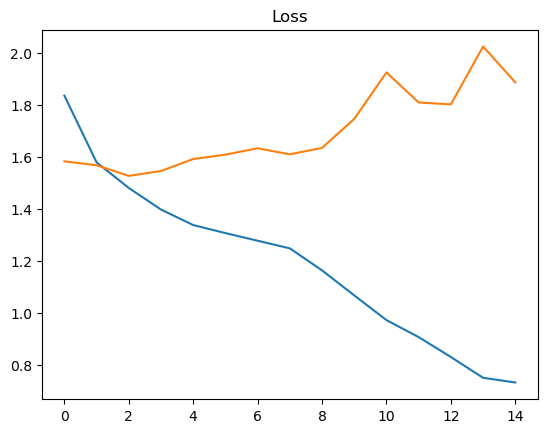

In [105]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.show()

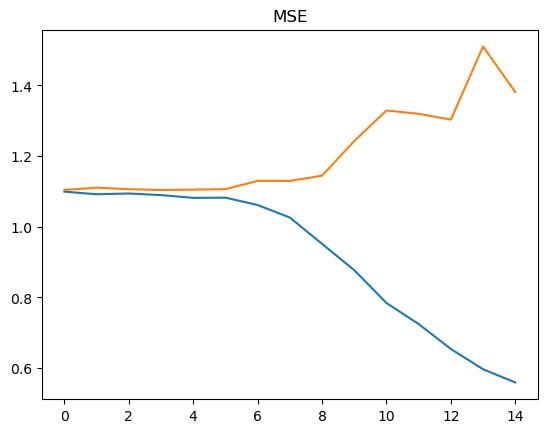

In [106]:
plt.plot(history.history['content_mse'])
plt.plot(history.history['val_content_mse'])
plt.title('MSE')
plt.show()

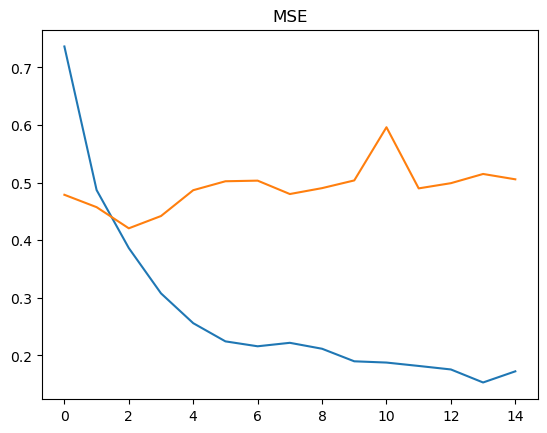

In [107]:
plt.plot(history.history['wording_mse'])
plt.plot(history.history['val_wording_mse'])
plt.title('MSE')
plt.show()